In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from sklearn.decomposition import PCA
from alembic.ddl.base import drop_column
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv(r"C:\Users\maria\OneDrive\Desktop\Heart_Disease_Project\data\heart_disease.csv\heart_disease.csv", header=None, na_values="?")
columns = [
    "age",        # age in years
    "sex",        # sex (1 = male; 0 = female)
    "cp",         # chest pain type (1-4)
    "trestbps",   # resting blood pressure
    "chol",       # serum cholesterol
    "fbs",        # fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
    "restecg",    # resting electrocardiographic results
    "thalach",    # maximum heart rate achieved
    "exang",      # exercise induced angina (1 = yes; 0 = no)
    "oldpeak",    # ST depression induced by exercise
    "slope",      # slope of peak exercise ST segment
    "ca",         # number of major vessels (0-3) colored by fluoroscopy
    "thal",       # thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect)
    "target"      # diagnosis of heart disease (0 = no, 1-4 = yes)
]
df.columns = columns

#handle missing values
df = df.dropna()
# Reset index (optional, for clean row numbers)
df = df.reset_index(drop=True)

# Check result
print(df.info())
print(df.head())
#dropped from 303 entries to 297 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 32.6 KB
None
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0   

In [3]:
# One-hot encode categorical features
categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
df_encoded = pd.get_dummies(df, columns = categorical_cols)
print(df_encoded.info())
print(df_encoded.head())

# Target column
y = df_encoded["target"]
# Features only
X = df_encoded.drop("target", axis=1)

Scaler = StandardScaler()
x_scaled = Scaler.fit_transform(df_encoded)

min_max_scaler = MinMaxScaler()
x_minmax = min_max_scaler.fit_transform(df_encoded)

print("Before scaling:\n", x_scaled[0:5, 0:5])
print("\nAfter scaling:\n", x_scaled[0:5, 0:5])
print("\nMinMaxScaler (first 5 rows, first 5 cols):")
print(x_minmax[0:5, 0:5])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          297 non-null    float64
 1   trestbps     297 non-null    float64
 2   chol         297 non-null    float64
 3   thalach      297 non-null    float64
 4   oldpeak      297 non-null    float64
 5   target       297 non-null    int64  
 6   sex_0.0      297 non-null    bool   
 7   sex_1.0      297 non-null    bool   
 8   cp_1.0       297 non-null    bool   
 9   cp_2.0       297 non-null    bool   
 10  cp_3.0       297 non-null    bool   
 11  cp_4.0       297 non-null    bool   
 12  fbs_0.0      297 non-null    bool   
 13  fbs_1.0      297 non-null    bool   
 14  restecg_0.0  297 non-null    bool   
 15  restecg_1.0  297 non-null    bool   
 16  restecg_2.0  297 non-null    bool   
 17  exang_0.0    297 non-null    bool   
 18  exang_1.0    297 non-null    bool   
 19  slope_1.

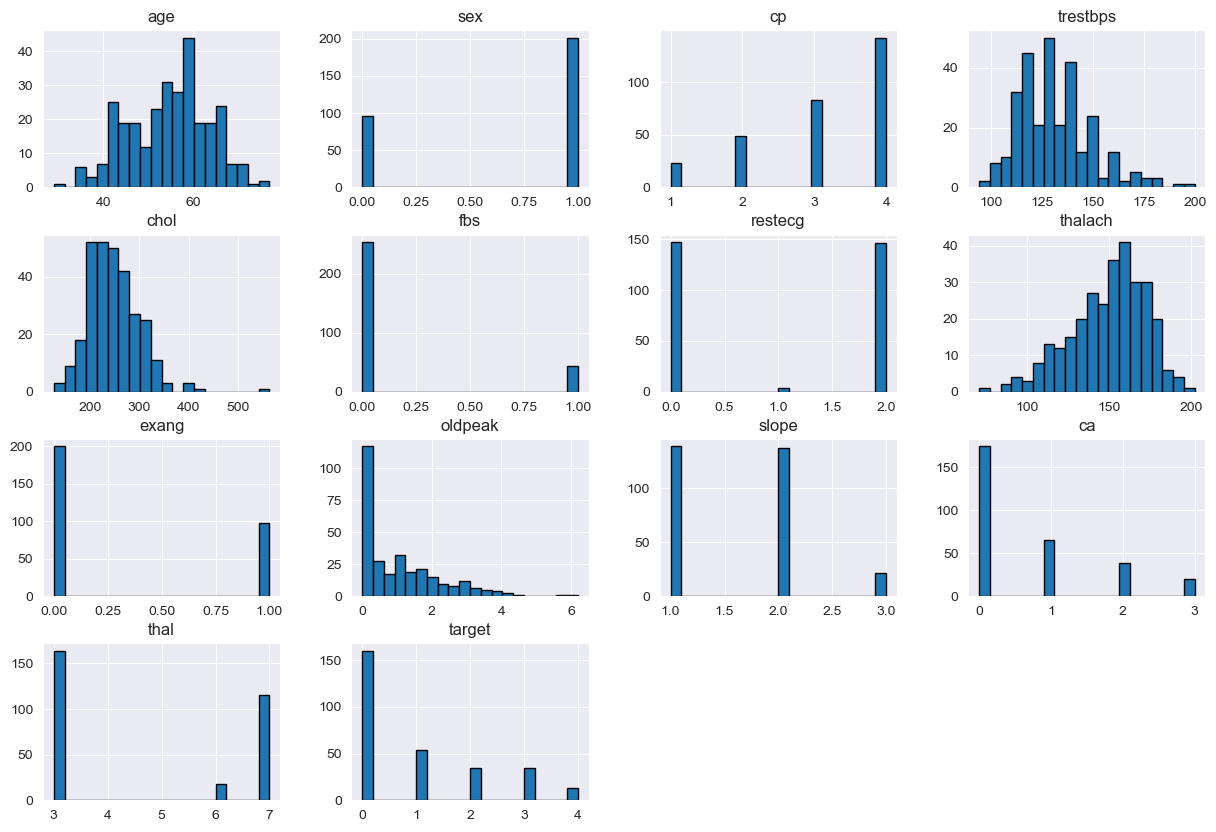

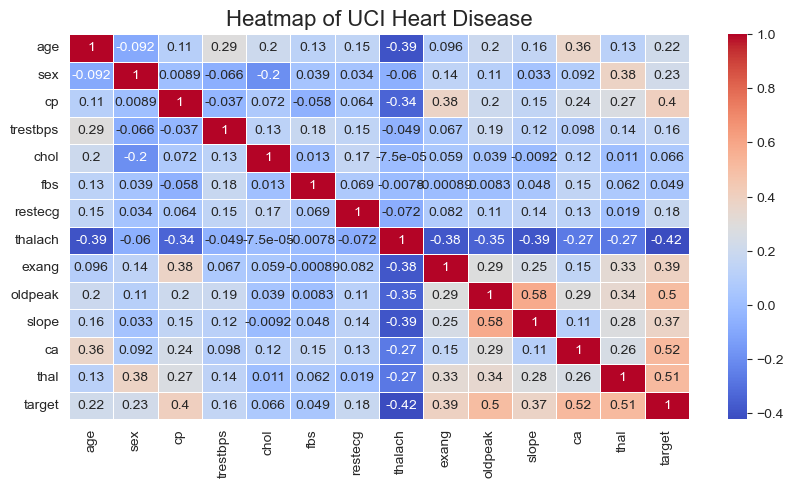

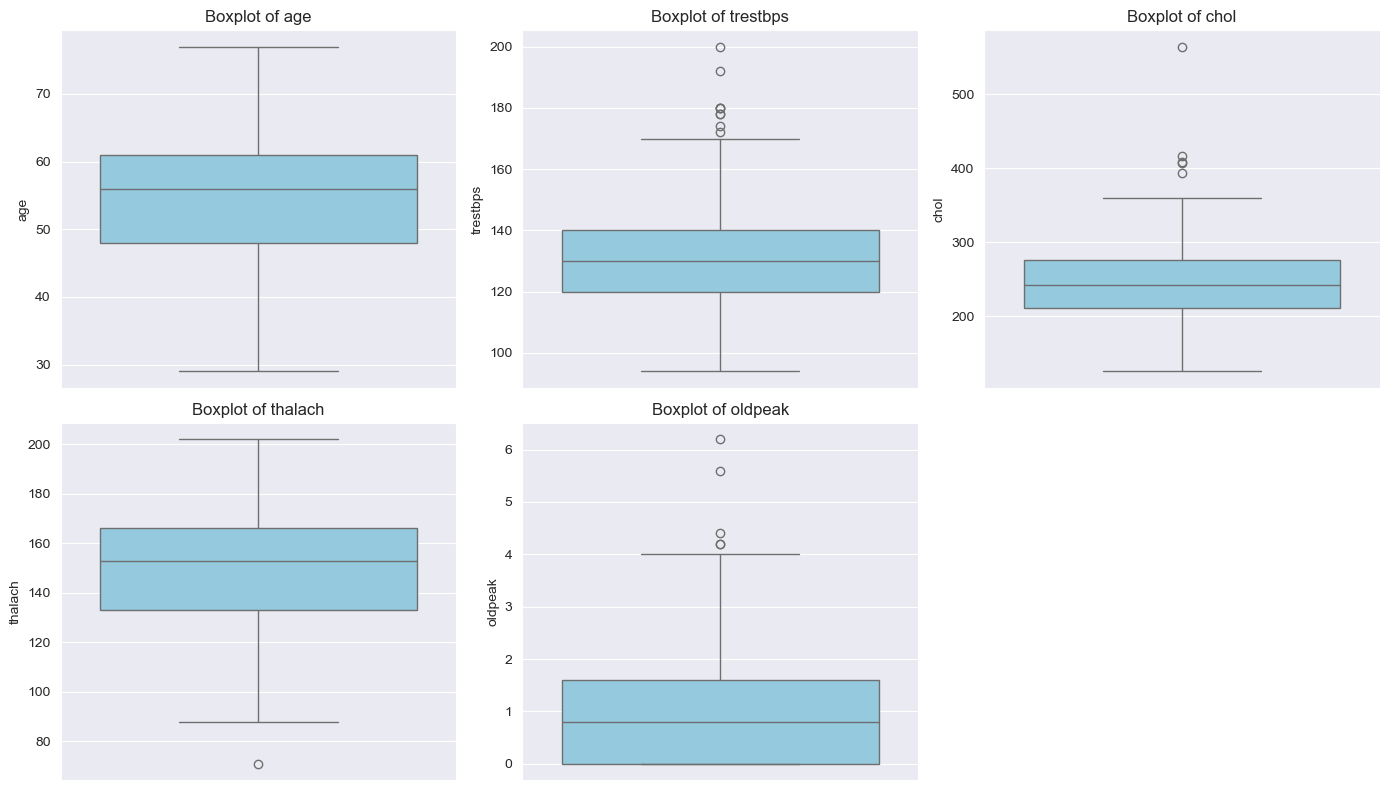

In [4]:
#Exploratory Data Analysis (EDA) -> Histograms, correlated heatmap, box plots
df.hist(figsize=(15, 10), edgecolor="black", bins=20)
plt.title("Histogram of UCI Heart Disease", fontsize=16)
plt.show()

plt.figure(figsize=(10, 5))
corr = df.corr()
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5, cbar=True)
plt.title("Heatmap of UCI Heart Disease", fontsize=16)
plt.show()

numeric_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

plt.figure(figsize=(14, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

Original shape: (297, 29)
PCA transformed shape: (297, 29)
Explained variance ratio per component:
[1.90728898e-01 8.70030639e-02 8.15209278e-02 6.43583122e-02
 6.16340053e-02 5.57943129e-02 5.05264065e-02 4.64752333e-02
 4.40262200e-02 4.17880285e-02 3.76898680e-02 3.45513887e-02
 3.19860146e-02 3.00294462e-02 2.93561711e-02 2.62318381e-02
 2.54911373e-02 2.20595726e-02 1.49373707e-02 1.27520735e-02
 1.10597111e-02 2.04381512e-17 1.76171079e-17 1.26775693e-17
 4.48950845e-18 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


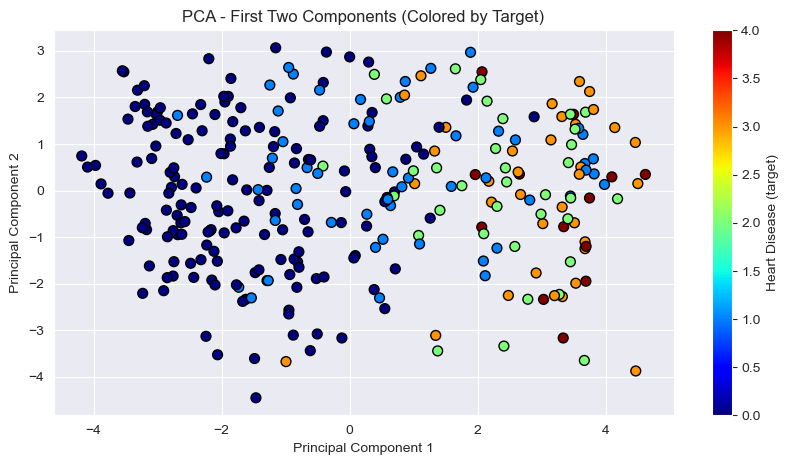

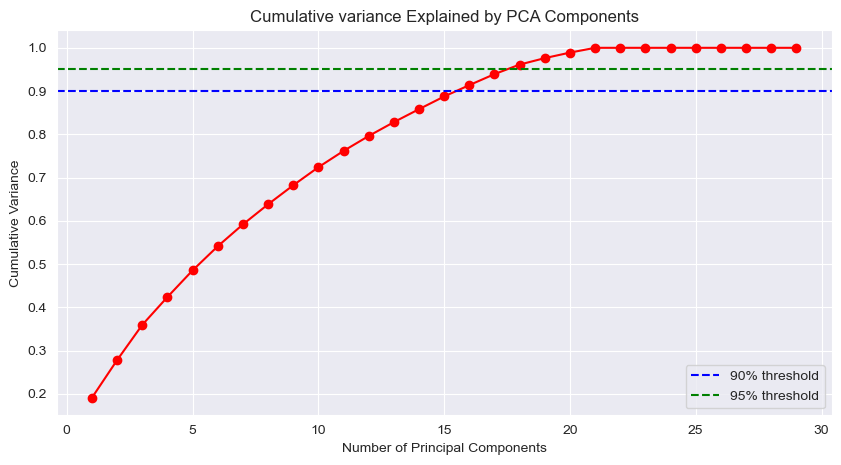

In [5]:
#apply PCA
pca = PCA()
xpca = pca.fit_transform(x_scaled)
print("Original shape:", x_scaled.shape)
print("PCA transformed shape:", xpca.shape)

# Explained variance ratio for each PC
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio per component:")
print(explained_variance)

#visualize PCA w/ scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(xpca[:, 0], xpca[:, 1], c=y, edgecolor="k", cmap="jet", s=50)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - First Two Components (Colored by Target)")
plt.colorbar(label="Heart Disease (target)")
plt.show()
#Each point = a patient.
# Color = target value (0 = no disease, 1–4 = disease).
# If you see separation/clusters, PCA is helping to show patterns

#Cumulative Variance Plot
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='red')
plt.axhline(y=0.90, color='blue', linestyle='--', label="90% threshold")
plt.axhline(y=0.95, color='green', linestyle='--', label="95% threshold")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance")
plt.title("Cumulative variance Explained by PCA Components")
plt.legend()
plt.grid(True)
plt.show()

Feature Ranking:
1. thalach (0.1389)
2. oldpeak (0.1179)
3. age (0.1152)
4. chol (0.1136)
5. trestbps (0.0993)
6. ca (0.0948)
7. thal (0.0824)
8. cp (0.0757)
9. exang (0.0464)
10. slope (0.0426)


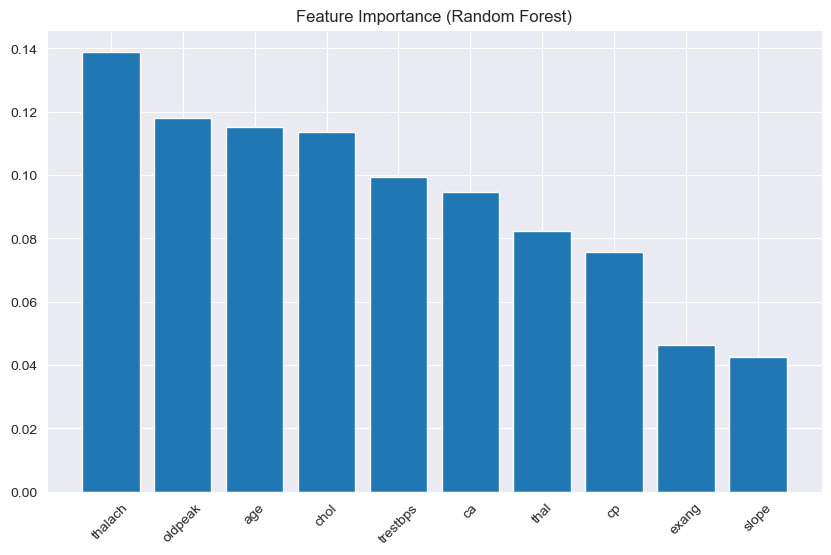

In [6]:
from sklearn.ensemble import RandomForestClassifier

#features and target
x = df.drop("target", axis=1)
y = df["target"]

#train random forest
rf = RandomForestClassifier(random_state=42)
rf.fit(x,y)

#get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = x.columns

print("Feature Ranking:")
for i in range(10):
    print(f"{i+1}. {features[indices[i]]} ({importances[indices[i]]:.4f})")

#plot bar chart
plt.figure(figsize=(10,6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), [features[i] for i in indices[:10]], rotation=45)
plt.show()

In [7]:
#Recursive feature Elimination RFE to select the best predictors.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, solver="liblinear")

rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(x, y)
print("Selected Features (RFE):")
selected_features = x.columns[fit.support_]
print(selected_features)

#Chi-Square Test
from sklearn.feature_selection import chi2

#scale features to +ve values (chi2 requires non -ve values)
x_chi = MinMaxScaler().fit_transform(x)
chi_scores, p_values = chi2(x_chi, y)
chi2_results = sorted(zip(x.columns, chi_scores, p_values), key=lambda x: x[1], reverse=True)

print("\nChi Square Feature Score:")
for feature, score, p in chi2_results[:10]:   #top 10
    print(f"{feature}: score={score:.2f}, p-value={p:.4f}\n")

#Select only the most relevant features for modeling
final_features = ["cp_4.0", "thal_7.0", "oldpeak", "thalach", "ca_0.0", "sex_1.0"]
X_reduced = X[final_features]
print("Final Reduced Features:\n", X_reduced.head())

Selected Features (RFE):
Index(['age', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope', 'ca',
       'thal'],
      dtype='object')

Chi Square Feature Score:
thal: score=48.19, p-value=0.0000

exang: score=39.12, p-value=0.0000

ca: score=35.74, p-value=0.0000

oldpeak: score=15.89, p-value=0.0032

slope: score=13.53, p-value=0.0089

cp: score=7.99, p-value=0.0919

sex: score=7.51, p-value=0.1112

fbs: score=6.78, p-value=0.1481

restecg: score=6.51, p-value=0.1640

thalach: score=3.19, p-value=0.5258

Final Reduced Features:
    cp_4.0  thal_7.0  oldpeak  thalach  ca_0.0  sex_1.0
0   False     False      2.3    150.0    True     True
1    True     False      1.5    108.0   False     True
2    True      True      2.6    129.0   False     True
3   False     False      3.5    187.0    True     True
4   False     False      1.4    172.0    True    False


In [8]:
x, y = make_classification(n_samples=303, n_features=13, n_classes=2, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print("dataset shape:", x.shape)
print("training set shape:", x_train.shape)

dataset shape: (303, 13)
training set shape: (242, 13)


Logistic regression results:
Accuracy: 0.885, Precision: 0.886, Recall: 0.912, F1-score: 0.899, AUC: 0.938

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



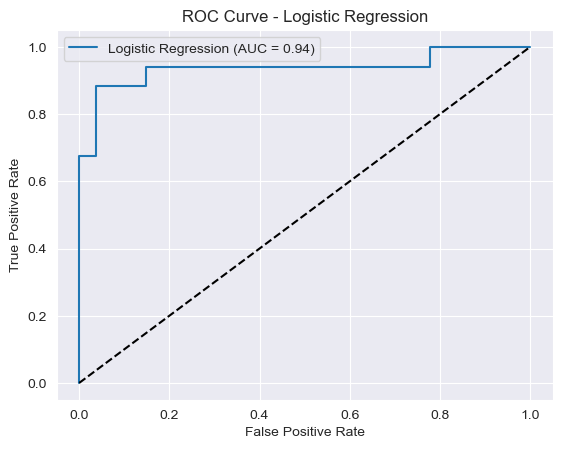

In [9]:
#logistic regression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(x_train_scaled, y_train)

# Predictions
y_pred = lr.predict(x_test_scaled)
y_proba = lr.predict_proba(x_test_scaled)[:,1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print("Logistic regression results:")
print(f"Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1-score: {f1:.3f}, AUC: {auc:.3f}")
print("\nClassification report:")
print(classification_report(y_test, y_pred))

#ROC, AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

Decision Tree
Accuracy: 0.918, Precision: 0.914, Recall: 0.941, F1-score: 0.928, AUC: 0.915


<function matplotlib.pyplot.show(close=None, block=None)>

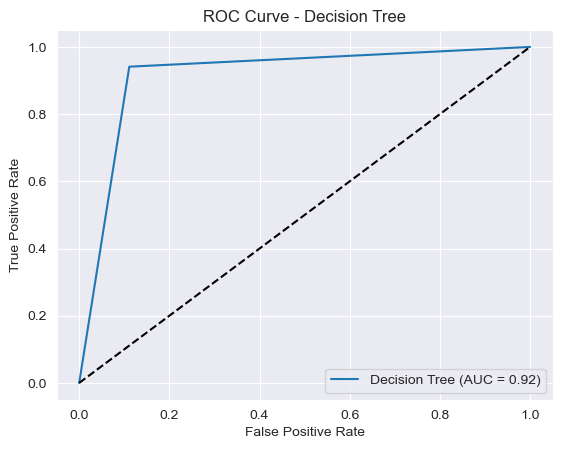

In [10]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(x_train_scaled, y_train)

y_pred = dtree.predict(x_test_scaled)
y_proba = dtree.predict_proba(x_test_scaled)[:,1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print("Decision Tree")
print(f"Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1-score: {f1:.3f}, AUC: {auc:.3f}")

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label = f"Decision Tree (AUC = {auc:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show

Random Forest
Accuracy: 0.918, Precision: 0.914, Recall: 0.941, F1-score: 0.928, AUC: 0.947


<function matplotlib.pyplot.show(close=None, block=None)>

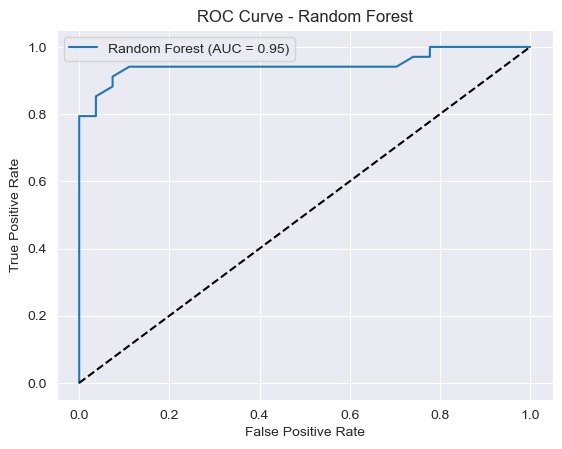

In [11]:
#Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_scaled, y_train)

y_pred = rf.predict(x_test_scaled)
y_proba = rf.predict_proba(x_test_scaled)[:,1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print("Random Forest")
print(f"Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1-score: {f1:.3f}, AUC: {auc:.3f}")

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label = f"Random Forest (AUC = {auc:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show

SVM
Accuracy: 0.902, Precision: 0.912, Recall: 0.912, F1-score: 0.912, AUC: 0.959


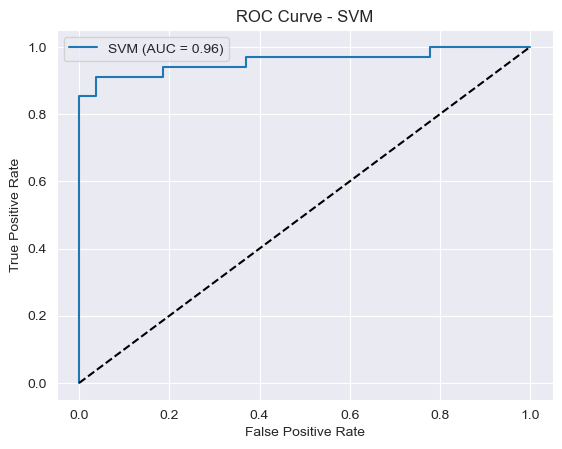

In [12]:
from sklearn.svm import SVC

# Initialize and train
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(x_train_scaled, y_train)

# Predictions
y_pred = svm_model.predict(x_test_scaled)
y_proba = svm_model.predict_proba(x_test_scaled)[:,1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print("SVM")
print(f"Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1-score: {f1:.3f}, AUC: {auc:.3f}")

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"SVM (AUC = {auc:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()


C:\Users\maria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\maria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\maria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\maria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

K-Means Cluster vs Actual Target:
target    0   1   2   3   4
row_0                      
0       145  23   1   1   0
1        15  31  34  34  13


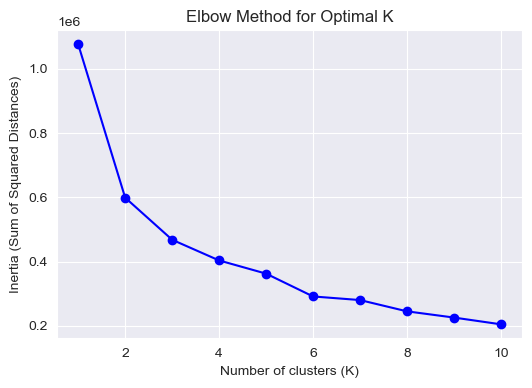

In [13]:
#K-Mean
import os
os.environ["OMP_NUM_THREADS"] = "1"
from sklearn.cluster import KMeans
# your KMeans code here

df = df.dropna()
X = df.drop('target', axis=1)
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.cluster import KMeans
# Use scaled data for clustering
x = x_train_scaled  # or x_scaled for full dataset

# Elbow method to find optimal K
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal K')

# From the plot, pick the elbow point (e.g., K=2)
x_scaled_full = x_scaled
k_optimal = 2
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters_kmeans = kmeans.fit_predict(x_scaled)
print("K-Means Cluster vs Actual Target:")
print(pd.crosstab(clusters_kmeans, y))

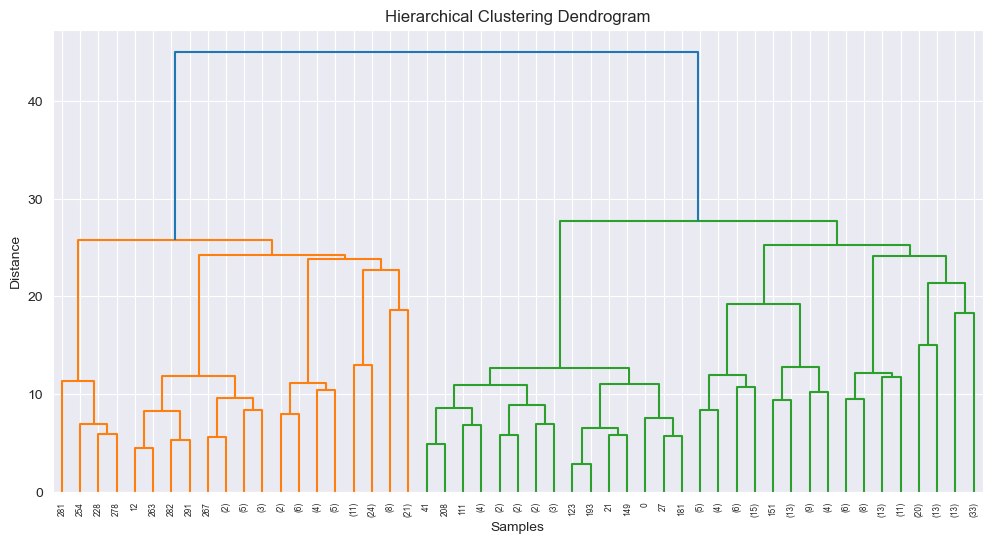

Hierarchical Cluster vs Actual Target:
target    0   1   2   3   4
row_0                      
1        11  21  30  27  11
2       149  33   5   8   2


In [14]:
#Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linkage_matrix = linkage(x_scaled, method='ward')

#plot dendrogram
plt.figure(figsize=(12,6))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Assign cluster labels (e.g., 2 clusters)
clusters_hier = fcluster(linkage_matrix, t=2, criterion='maxclust')
print("Hierarchical Cluster vs Actual Target:")
print(pd.crosstab(clusters_hier, y))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Baseline model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
baseline_acc = accuracy_score(y_test, y_pred)
print("Baseline Accuracy:", baseline_acc)


Baseline Accuracy: 0.6


In [16]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,   # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Accuracy after GridSearchCV:", accuracy_score(y_test, y_pred_best))


Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy after GridSearchCV: 0.6166666666666667


In [17]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 15),
    'min_samples_split': randint(2, 10)
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,      # number of random combinations to try
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
print("Best Hyperparameters (RandomizedSearchCV):", random_search.best_params_)
best_model_random = random_search.best_estimator_
y_pred_random = best_model_random.predict(X_test)
print("Accuracy after RandomizedSearchCV:", accuracy_score(y_test, y_pred_random))


Best Hyperparameters (RandomizedSearchCV): {'max_depth': 14, 'min_samples_split': 6, 'n_estimators': 210}
Accuracy after RandomizedSearchCV: 0.6166666666666667


In [18]:
from sklearn.pipeline import Pipeline

# Example: using the best GridSearchCV model
best_grid_model = grid_search.best_estimator_  # from Step 2.6

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # preprocessing
    ('model', best_model)          # trained model
])
pipeline.fit(X_scaled, y)  # fit on the full dataset for deployment

import joblib

# Save the pipeline as a .pkl file
joblib.dump(pipeline, 'heart_disease_model.pkl')
print("Model exported successfully as 'heart_disease_model.pkl'")


import os
print(os.getcwd())  # prints current working directory


Model exported successfully as 'heart_disease_model.pkl'
C:\Users\maria\OneDrive\Desktop\Heart_Disease_Project
